In [1271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv(
    'AmesHousing.txt',
    sep ='\t',
    keep_default_na = False ,
    na_values=[''])

# 2. Candidate Models

In [1272]:
# Data Overview

data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [1273]:
# Null Value Overview

print(data.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [1274]:
# Null Value Drop

dc = data.dropna()
print(dc.isnull().sum())

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64


In [1275]:
# Categorical Data Removal

dc = data.drop(['Order','PID'],axis=1)
dc

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NA,IR1,Low,AllPub,Inside,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


## M1: Linear Regression Model

In [1353]:
x = dc['Gr Liv Area'].to_numpy()
y = dc['SalePrice'].to_numpy()

## M2: Polynomial Regression Model

In [1359]:
dc['Gr Liv Area^2'] = dc['Gr Liv Area']**2
dc['Gr Liv Area^3'] = dc['Gr Liv Area']**3 
dc['Gr Liv Area^4'] = dc['Gr Liv Area']**4
dc['Gr Liv Area^5'] = dc['Gr Liv Area']**5

## M3: Multiple Regression Model

In [1360]:
x = dc['Gr Liv Area^2'], dc['Gr Liv Area^3'], dc['Gr Liv Area^4'], dc['Gr Liv Area^5']

y = dc['SalePrice'].to_numpy()

## M3

In [1281]:
# Interaction Variable Addition 

dc['Above Ground'] = dc['Gr Liv Area'] * dc['Garage Area']
dc

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Gr Liv Area^2,Gr Liv Area^3,Gr Liv Area^4,Gr Liv Area^5,Above Ground
0,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,...,5,2010,WD,Normal,215000,2742336,4541308416,7520406736896,12453793556299776,874368.0
1,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,6,2010,WD,Normal,105000,802816,719323136,644513529856,577484122750976,654080.0
2,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,6,2010,WD,Normal,172000,1766241,2347334289,3119607270081,4145958061937649,414648.0
3,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,...,4,2010,WD,Normal,244000,4452100,9393931000,19821194410000,41822720205100000,1101420.0
4,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,3,2010,WD,Normal,189900,2653641,4322781189,7041810556881,11471109397159149,785178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,3,2006,WD,Normal,142500,1006009,1009027027,1012054108081,1015090270405243,589764.0
2926,20,RL,NaN,8885,Pave,NA,IR1,Low,AllPub,Inside,...,6,2006,WD,Normal,131000,813604,733870808,661951468816,597080224872032,436568.0
2927,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,Inside,...,7,2006,WD,Normal,132000,940900,912673000,885292810000,858734025700000,0.0
2928,20,RL,77.0,10010,Pave,NA,Reg,Lvl,AllPub,Inside,...,4,2006,WD,Normal,170000,1929321,2679826869,3722279521041,5170246254725949,580602.0


In [1452]:
corr = dc.corr()['SalePrice'].sort_values(ascending = 0).drop('Gr Liv Area^2').drop('Gr Liv Area^3').drop('Gr Liv Area^4').drop('Gr Liv Area^5').drop('Overall Qual').drop('Above Ground').head(15)
corr

SalePrice         1.000000
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Name: SalePrice, dtype: float64

In [ ]:
# Correlation of variables against Gr Liv Area sorted ascending

corre = dc.corr()['Gr Liv Area'].sort_values(ascending = 0).drop('Gr Liv Area^2').drop('Gr Liv Area^3').drop('Gr Liv Area^4').drop('Gr Liv Area^5').drop('Overall Qual').drop('Above Ground').head(15)
corre

In [1283]:
# Multicollinearity check

multicorr = dc.corr()[['SalePrice',
                       'Gr Liv Area',
                       'TotRms AbvGrd',
                       '2nd Flr SF',
                       'Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Fireplaces',
                       'Above Ground']].drop('Gr Liv Area^2').drop('Gr Liv Area^3').drop('Gr Liv Area^4').drop('Overall Qual').drop('Garage Cars').sort_values('Gr Liv Area',
                                                                                                                      ascending=False).head(8)                                                                                
multicorr

,SalePrice,Gr Liv Area,TotRms AbvGrd,2nd Flr SF,Full Bath,1st Flr SF,Garage Area,Fireplaces,Above Ground
Gr Liv Area,0.706780,1.000000,0.807772,0.655251,0.630321,0.562166,0.484892,0.454924,0.813607
Above Ground,0.766046,0.813607,0.594393,0.405694,0.542370,0.606162,0.849639,0.405664,1.000000
TotRms AbvGrd,0.495474,0.807772,1.000000,0.585214,0.528599,0.390162,0.327280,0.302865,0.594393
SalePrice,1.000000,0.706780,0.495474,0.269373,0.545604,0.621676,0.640401,0.474558,0.766046
2nd Flr SF,0.269373,0.655251,0.585214,1.000000,0.404143,-0.250057,0.128614,0.165844,0.405694
Full Bath,0.545604,0.630321,0.528599,0.404143,1.000000,0.371584,0.407464,0.229793,0.542370
1st Flr SF,0.621676,0.562166,0.390162,-0.250057,0.371584,1.000000,0.491223,0.406345,0.606162
Bedroom AbvGr,0.143913,0.516808,0.672647,0.504651,0.359489,0.106648,0.073610,0.076971,0.271525


In [1354]:
# Model 2

x = dc[['Gr Liv Area','TotRms AbvGrd',
                       '2nd Flr SF',
                       'Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Above Ground']].to_numpy()

y = y = dc['SalePrice'].to_numpy()

array([[1.65600e+03, 7.00000e+00, 0.00000e+00, ..., 1.65600e+03,
        5.28000e+02, 8.74368e+05],
       [8.96000e+02, 5.00000e+00, 0.00000e+00, ..., 8.96000e+02,
        7.30000e+02, 6.54080e+05],
       [1.32900e+03, 6.00000e+00, 0.00000e+00, ..., 1.32900e+03,
        3.12000e+02, 4.14648e+05],
       ...,
       [9.70000e+02, 6.00000e+00, 0.00000e+00, ..., 9.70000e+02,
        0.00000e+00, 0.00000e+00],
       [1.38900e+03, 6.00000e+00, 0.00000e+00, ..., 1.38900e+03,
        4.18000e+02, 5.80602e+05],
       [2.00000e+03, 9.00000e+00, 1.00400e+03, ..., 9.96000e+02,
        6.50000e+02, 1.30000e+06]])

# 3. Model Selection & Estimation

## M1

In [1440]:
# Model

x = dc['Gr Liv Area'].to_numpy()
y = dc['SalePrice'].to_numpy()

In [1437]:
# 60%-20%-20% train-vali-test split

x_tv, x_test, y_tv, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

print('Test:', x_test.shape)
print('Train and vali:', x_tv.shape)
print('----------------------------')


# 50%-25%-25% train-vali-test split
x_train, x_vali, y_train, y_vali = train_test_split(x_tv, y_tv, test_size = 0.25, random_state = 1)


print('Training:', x_train.shape)
print('Validation:', x_vali.shape)

Test: (586, 5)
Train and vali: (2344, 5)
----------------------------
Training: (1758, 5)
Validation: (586, 5)


In [1396]:
# Regression Model Fit

linear_reg = LinearRegression()
linear_reg.fit(x_train.reshape(-1,1),y_train)

ones = np.ones((x_train.shape[0],1))
X_train = np.hstack((ones,x_train.reshape(-1,1))) 

LinearRegression()

In [1398]:
# Regression Model Parameter Coefficients

print('b0: {:.4f}'.format(linear_reg.intercept_))
print('b1: {:.4f}'.format(linear_reg.coef_[0]))

b0: 22600.2372
b1: 106.0999


In [1399]:
# Training MSE

pred_train = linear_reg.predict(x_train.reshape(-1,1))
mse_train = mse(y_train,pred_train) 
print('mse_train: {:.4f}'.format(mse_train))

mse_train: 3406954680.6323


In [1400]:
# Validation MSE

pred_vali=linear_reg.predict(x_vali.reshape(-1,1)) 
mse_vali = mse(y_vali,pred_vali)
print('mse_vali: {:.4f}'.format(mse_vali))

mse_vali: 3071063932.7801


In [1401]:
# Residuals

pred = linear_reg.predict(x.reshape(-1,1))
residuals = y-pred 

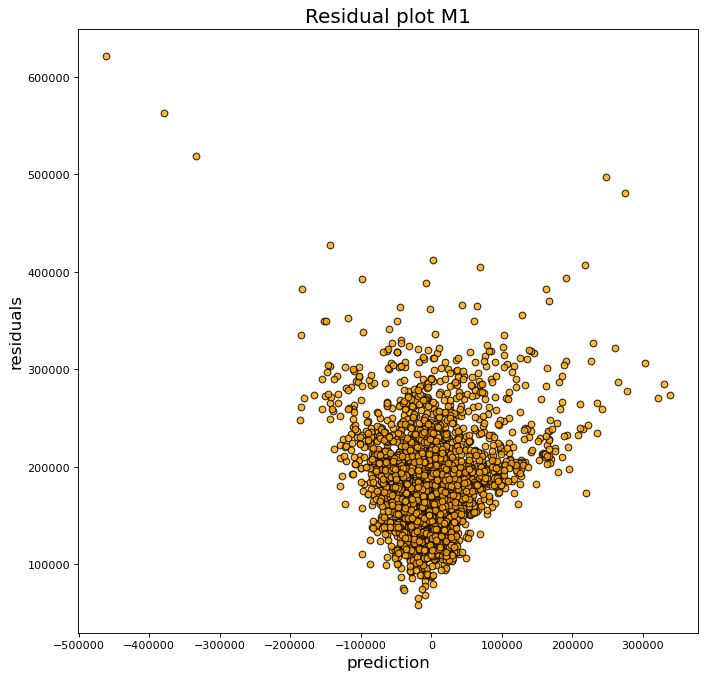

In [1402]:
# Scatter Graph

plt.figure(figsize=(10,10), dpi = 80)
plt.scatter(residuals, pred, color = 'orange', edgecolor = 'black', alpha = 0.8)
plt.xlabel('prediction',fontsize=15)
plt.ylabel('residuals',fontsize=15)
plt.title('Residual plot M1',fontsize=18)
plt.show()

## M2

In [1410]:
# Model

x = dc[['Gr Liv Area','Gr Liv Area^2','Gr Liv Area^3','Gr Liv Area^4','Gr Liv Area^5']].to_numpy()
y = dc[['SalePrice']].to_numpy()

In [1411]:
# 60%-20%-20% train-vali-test split

x_tv,x_test,y_tv,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# 50%-25%-25% train-vali-test split

x_train,x_vali,y_train,y_vali = train_test_split(x_tv,y_tv,test_size=0.25,random_state=1)

print('Test:', x_test.shape)
print('Train and vali:', x_tv.shape)
print('Training:', x_train.shape)
print('Validation:', x_vali.shape)

Test: (586, 5)
Train and vali: (2344, 5)
Training: (1758, 5)
Validation: (586, 5)


In [1442]:
# Regression Model Fit

linear_reg = LinearRegression()
linear_reg.fit(x_train.reshape(-1,5), y_train)

ones = np.ones((x_train.shape[0],1))
X_train = np.hstack((ones,x_train.reshape(-1,5))) 

coef = (np.linalg.inv(X_train.T @ X_train)) @ (X_train.T) @ y_train

In [1420]:
# Regression Model Parameter Coefficients

for i in range (6):
    print('b{}: {:}'.format(i,coef[i]))

b0: [-85154.77044568]
b1: [371.13392455]
b2: [-0.24247997]
b3: [9.96459627e-05]
b4: [-1.73565749e-08]
b5: [9.63731595e-13]


In [1421]:
# Training MSE

pred_train = linear_reg.predict(x_train.reshape(-1,5))
mse_train = mse(y_train,pred_train) 
print('mse_train: {:.4f}'.format(mse_train))

mse_train: 3193585331.2808


In [1303]:
# Validation MSE

pred_vali=linear_reg.predict(x_vali.reshape(-1,5)) 
mse_vali = mse(y_vali,pred_vali)
print('mse_vali: {:.4f}'.format(mse_vali))

mse_vali: 3094985896.5232


In [1304]:
# Residuals

pred2 = linear_reg.predict(x_vali.reshape(-1,5))
residuals2 = y_vali-pred2 

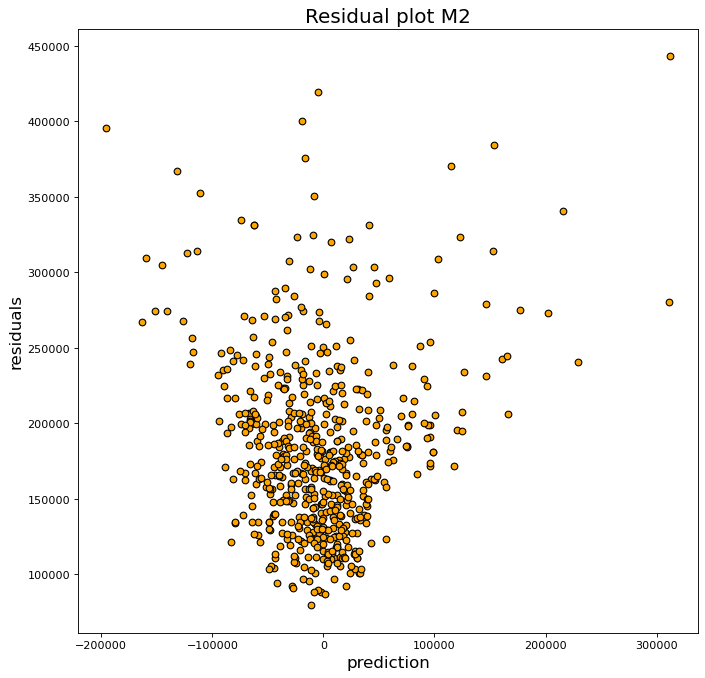

In [1305]:
# Scatter Graph

plt.figure(figsize=(10,10), dpi = 80)
plt.scatter(residuals2, pred2, color = 'orange', edgecolor = 'black', alpha = 1)
plt.xlabel('prediction',fontsize=15)
plt.ylabel('residuals',fontsize=15)
plt.title('Residual plot M2',fontsize=18)
plt.show()

## M3

In [1309]:
# Model


M3 = dc[['Gr Liv Area','TotRms AbvGrd', '2nd Flr SF','Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Above Ground', 'SalePrice']].dropna()

x3 = M3[['Gr Liv Area','TotRms AbvGrd',
                       '2nd Flr SF',
                       'Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Above Ground']].to_numpy()

y3 = M3['SalePrice'].to_numpy()

print(x3.shape)
print(y3.shape)

(2929, 7)
(2929,)


In [1443]:
# 60%-20%-20% train-vali-test split

x_tv3,x_test3,y_tv3,y_test3 = train_test_split(x3,y3,test_size = 0.2,random_state=1)

# 50%-25%-25% train-vali-test split

x_train3,x_vali3, y_train3, y_vali3 = train_test_split(x_tv3,y_tv3,test_size=1/4,random_state = 1) 

print('Test:', x_test3.shape)
print('Train and vali:', x_tv3.shape)
print('Training:', x_train3.shape)
print('Validation:', x_vali3.shape)

Test: (586, 8)
Train and vali: (2343, 8)
Training: (1757, 8)
Validation: (586, 8)


In [1312]:
# Regression Model Fit

linear_reg = LinearRegression()
linear_reg.fit(x_train3.reshape(-1,7),y_train3)

ones = np.ones((x_train3.shape[0],1))
X_train3 = np.hstack((ones,x_train3.reshape(-1,7)))
print(X_train3)

coef = (np.linalg.inv(X_train3.T @ X_train3)) @ (X_train3.T) @ y_train3

In [1313]:
# Regression Model Parameter Coefficients

for i in range (7):
    print('b{}: {:.4f}'.format(i,coef[i]))

b0: -17518.6911
b1: -19.2552
b2: -7148.3518
b3: 99.2682
b4: 16503.8127
b5: 136.9650
b6: 142.6362


In [1314]:
# Training MSE

pred_train3 = linear_reg.predict(x_train3.reshape(-1,7))
mse_train3 = mse(y_train3,pred_train3) 
print('mse_train: {:.4f}'.format(mse_train3))

mse_train: 2259569297.7628


In [1315]:
# Validation MSE

pred_vali3 =linear_reg.predict(x_vali3.reshape(-1,7)) 
mse_vali3 = mse(y_vali3,pred_vali3)
print('mse_vali: {:.4f}'.format(mse_vali3))

mse_vali: 2238055502.3055


In [1316]:
# Residuals

pred3 = linear_reg.predict(x_vali3.reshape(-1,7))
residuals3 = y_vali3-pred3

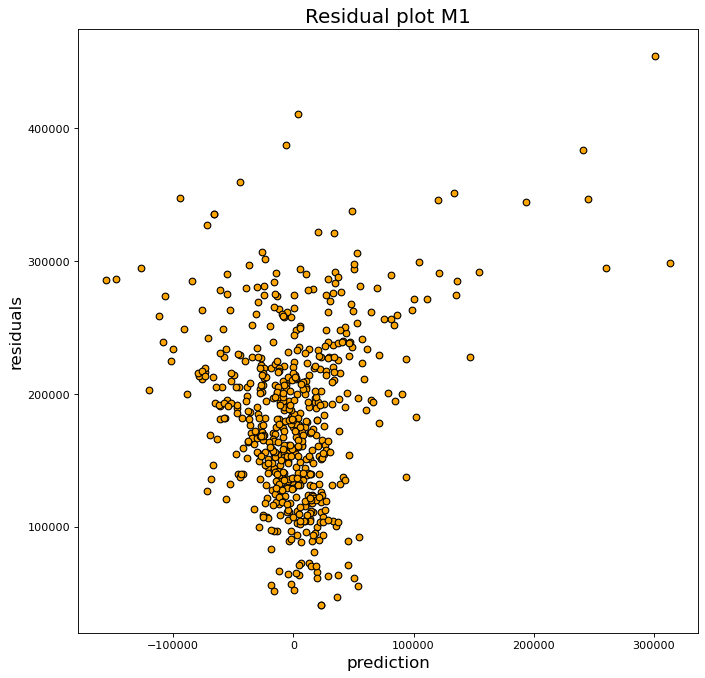

In [1422]:
# Scatter Graph

plt.figure(figsize=(10,10), dpi = 80)
plt.scatter(residuals3, pred3, color = 'orange', edgecolor = 'black', alpha = 1)
plt.xlabel('prediction',fontsize=15)
plt.ylabel('residuals',fontsize=15)
plt.title('Residual plot M1',fontsize=18)
plt.show()

# 4. Model Evaluation

## BM1

In [1424]:
# Define Dataset

M3 = dc[['Gr Liv Area','TotRms AbvGrd', '2nd Flr SF','Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Above Ground', 'SalePrice','Neighborhood']].dropna()

x3 = M3[['Gr Liv Area','TotRms AbvGrd',
                       '2nd Flr SF',
                       'Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Above Ground','Neighborhood']].to_numpy()

y3 = M3['SalePrice'].to_numpy()

x3_tv,x3_test,y3_tv,y3_test = train_test_split(x3,y3,test_size=0.20,random_state = 1)

print(x3_test.shape)
print(y3_test.shape)

(586, 8)
(586,)


In [1453]:
# Sale Price mean from training validation set 
y_tv_ave = y_tv.mean()
y_tv_ave

181714.1646757679

In [1450]:
y_pred_3 = np.ones((y_test.shape[0],1))
y_pred_3[:,0] = y_tv_ave


BM1_mse = mse(y_test3,y_pred_3)
print('BM1 MSE: {:.4f}'.format(mse_BM1))

BM1 MSE: 6809077222.6112


In [1448]:
linear_reg=LinearRegression()
linear_reg.fit(x_tv3,y_tv3)


pred = linear_reg.predict(x_test3)

mse_test = mse(y_test3,pred3)
print('{:.4f}'.format(mse_test))

ValueError: could not convert string to float: 'Somerst'

## BM2

In [1446]:
n = M3['Neighborhood']
n_1 = n.reset_index()

In [1445]:
n_price = pd.DataFrame(M3.groupby('Neighborhood').mean().reset_index())

n_price['Neighborhood1']= ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','Greens',
         'GrnHill','IDOTRR','Landmrk','MeadowV','Mitchel','NAmes','NPkVill','NWAmes','NoRidge','NridgHt',
         'OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']                          

In [1444]:
xpd=pd.DataFrame(x3_test, columns=['Gr Liv Area','TotRms AbvGrd',
                       '2nd Flr SF',
                       'Full Bath',
                       '1st Flr SF',
                       'Garage Area',
                       'Above Ground', 'Neighborhood'])
ypd=pd.DataFrame(y3_test, columns=['SalePrice'])
n_test = pd.concat([xpd,ypd],axis=1)

n_pred = n_test.merge(neigh_price, on='Neighborhood')

In [1434]:
y_truey = n_pred['SalePrice_x'].to_numpy()
y_predy = n_pred['SalePrice_y'].to_numpy()

In [1447]:
BM2_mse = mse(y_true_2,y_pred_2)
print('BM2 MSE: {:.4f}'.format(mse_BM2))

BM2 MSE: 2817163949.9946
